In [1]:
#IMPORTING SETUP PACKAGES
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_pickle('/Users/gabriele.sabato/PycharmProjects/raw_data/DataFrames/Top10_seller_YTD_group_by_item_visit.pickle')


In [3]:
df



,min_date,max_date,item_code,item_price,delivery_weeks,avg_sales,avg_unique_views,conv_rate,bin,item_parent_item_code,item_main_category,item_sub_category_1,item_sub_category_2,log_price,log_delivery_weeks,log_sales,log_avg_unique_views,log_conv_rate
0,2020-01-01,2020-01-02,000000001000021540,1449.99,2,1.500000,323.500000,0.004637,2,000000008000001826,POLSTER,WOHNLANDSCHAFTEN,WOHNLANDSCHAFTEN,7.279312,0.693197,0.405532,5.779199,-5.352397
1,2020-01-01,2020-01-07,000000001000054984,749.99,2,2.142857,152.142857,0.014085,7,000000008000006211,POLSTER,ECKSOFAS,LONGCHAIR,6.620060,0.693197,0.762187,5.024821,-4.255605
2,2020-01-01,2020-01-01,000000001000016021,119.99,5,23.000000,639.000000,0.035994,1,000000008000001083,ESSZIMMERSTÜHLE&BÄNKE,ESSZIMMERSTÜHLE,KLASSISCH,4.787409,1.609458,3.135499,6.459905,-3.321636
3,2020-01-01,2020-01-05,000000001000016133,119.99,1,10.600000,459.600000,0.023064,5,000000008000001083,ESSZIMMERSTÜHLE&BÄNKE,ESSZIMMERSTÜHLE,KLASSISCH,4.787409,0.000100,2.360863,6.130357,-3.765176
4,2020-01-01,2020-01-07,000000001000073170,429.99,2,4.571429,902.857143,0.005063,7,000000008000007781,POLSTER,SCHLAFSOFAS,LÄNGSSCHLÄFER,6.063762,0.693197,1.519848,6.805564,-5.266181
5,2020-01-01,2020-01-07,000000001000054983,749.99,2,1.571429,510.428571,0.003079,7,000000008000006211,POLSTER,ECKSOFAS,LONGCHAIR,6.620060,0.693197,0.452049,6.235251,-5.751300
6,2020-01-01,2020-01-07,000000001000015496,699.99,2,3.714286,565.285714,0.006571,7,000000008000001000,POLSTER,EINZELSOFAS,EINZELSOFAS,6.551066,0.693197,1.312213,6.337331,-5.010040
7,2020-01-01,2020-03-12,000000001000062031,1899.99,2,0.555556,388.541667,0.001430,72,000000008000006759,BETTEN,BOXSPRINGBETTEN,BOXSPRINGBETTEN,7.549604,0.693197,-0.587607,5.962401,-6.482587
8,2020-01-01,2020-01-10,000000001000021539,1449.99,2,1.400000,451.100000,0.003104,10,000000008000001826,POLSTER,WOHNLANDSCHAFTEN,WOHNLANDSCHAFTEN,7.279312,0.693197,0.336544,6.111689,-5.743504
9,2020-01-01,2020-01-27,000000001000113432,849.99,2,1.000000,386.851852,0.002585,27,000000008000012999,POLSTER,BIGSOFAS,BIGSOFAS,6.745225,0.693197,0.000100,5.958042,-5.920086


In [4]:
print(df.dtypes)

min_date                  object
max_date                  object
item_code                 object
item_price               float64
delivery_weeks             int64
avg_sales                float64
avg_unique_views         float64
conv_rate                float64
bin                        int32
item_parent_item_code     object
item_main_category        object
item_sub_category_1       object
item_sub_category_2       object
log_price                float64
log_delivery_weeks       float64
log_sales                float64
log_avg_unique_views     float64
log_conv_rate            float64
dtype: object


In [5]:
def filter_df(DF = df,bins=6, avg_PDP = 19.):
    df_filt = DF[DF['bin'] > bins]
    df_items = df_filt.groupby('item_code').item_price.nunique() > 1
    df_filt  = df_filt.merge(df_items,on='item_code',how='inner')
    df_filt  = df_filt[df_filt['item_price_y']== True]
    #filter PDP
    #print(df_filt)
    df_filt = df_filt[df_filt['avg_unique_views'] > avg_PDP]
    #print(df_filt)
    return df_filt

In [6]:
df_filt = filter_df(df)

In [33]:
list_of_items = list(df_filt.item_code.unique())

print(list_of_items)

['000000001000054984', '000000001000073170', '000000001000054983', '000000001000015496', '000000001000062031', '000000001000021539', '000000001000113432', '000000001000016133', '000000001000021540', '000000001000016021']


In [34]:
def create_map_of_dataframes(items_list = list_of_items,df=df_filt):
    map_of_df = {}
    for item in items_list:
        df_mod = df[df['item_code'] == item]
        #print(f'Number of items per cluster {df_mod.item_code.nunique()}')
        map_of_df[item]= df_mod
    return map_of_df



In [36]:
def run_model(item_code, df, map_results):
    #print('\n')
    #print(f'Running model for the item = {item_code}')
    wls_cr_with_fe = smf.wls("conv_rate ~ log_price + log_delivery_weeks + C(item_code)", df, weights=df['bin']).fit()
    #print(wls_cr_with_fe.summary())
    beta_log_price, beta_std_err_log_price = wls_cr_with_fe.params[-2].round(4),wls_cr_with_fe.bse[-2].round(4)
    beta_log_del, beta_std_err_log_del = wls_cr_with_fe.params[-1].round(4),wls_cr_with_fe.bse[-1].round(4)
    Result_log_price = 'Log_price  = ' + str(beta_log_price) + ' ± ' + str(beta_std_err_log_price)
    Result_log_del = 'Log_del_week = ' + str(beta_log_del) + ' ± ' + str(beta_std_err_log_del)
    flag_stat_ok = abs((3*beta_std_err_log_price)/beta_log_price) < 1.

    if flag_stat_ok:
        #print(f'Enough statistics for the item = {item_code}')
        #print(Result_log_price)
        #print(Result_log_del)
        map_results[item_code] = [beta_log_price, beta_std_err_log_price, beta_log_del,beta_std_err_log_del, df.item_code.nunique(), True]
        #print(map_results[item_code])
        return True
    else:
        #print(f'Not enough statistics for the item = {item_code}')
        #print(Result_log_price)
        #print(Result_log_del)
        map_results[item_code] = [beta_log_price, beta_std_err_log_price, beta_log_del,beta_std_err_log_del, df.item_code.nunique(), False]
        #print(map_results[item_code])
        return False


In [37]:
df_result = pd.DataFrame()

#print('Cut on PDP, sim_score, result = ')
map_of_dfs = create_map_of_dataframes()

print(f'Number of items passing the PE cut {len(map_of_dfs)}')

map_result = {}

#print("Model used: conv_rate ~ log_price + log_delivery_weeks + C(item_code)\n")
map_items_stat = {}
for key in map_of_dfs.keys():
    map_items_stat[key] = run_model(key, map_of_dfs[key], map_result)

            #print(map_result)

items_stat_series = pd.Series(map_items_stat)
        #print(map_items_stat)
        #print(items_stat_series)


        
x,y, y_err, rel_err = {'True':[],'False':[]},{'True':[],'False':[]},{'True':[],'False':[]},{'True':[],'False':[]}
for i_code,flag in items_stat_series.items():
        #flag=T
    if flag == True:

        y['True'].append(map_result[i_code][0])
        y_err['True'].append(map_result[i_code][1])
        x['True'].append(map_result[i_code][-1])
        rel_err['True'].append(abs(map_result[i_code][1]/map_result[i_code][0]))
    else:
        y['False'].append(map_result[i_code][0])
        y_err['False'].append(map_result[i_code][1])
        x['False'].append(map_result[i_code][-1])
        rel_err['False'].append(abs(map_result[i_code][1]/map_result[i_code][0]))
        continue
        #print(f'{PDP_cut},{score_cut} , {len(x)}')
df_result = pd.DataFrame.from_dict(map_result, orient='index', columns = ['PE', 'PE_err', 'log_del_week', 'log_del_week_err', 'Cluster_size', 'has_enough_stat'])
print (df_result.head(100))


Number of items passing the PE cut 10
                        PE  PE_err  log_del_week  log_del_week_err  \
000000001000054984 -0.0015  0.0141       -0.0013            0.0012   
000000001000073170 -0.0528  0.0100       -0.0060            0.0031   
000000001000054983  0.0562  0.0521       -0.0046            0.0048   
000000001000015496 -0.0143  0.0130       -0.0012            0.0019   
000000001000062031 -0.0174  0.0063       -0.0013            0.0027   
000000001000021539 -0.0232  0.0114        0.0043            0.0052   
000000001000113432  0.0237  0.0890       -0.0718            0.2811   
000000001000016133 -0.1322  0.0513       -0.0055            0.0037   
000000001000021540 -0.0324  0.0253        0.1126            0.0852   
000000001000016021 -0.1343  0.0660        0.0103            0.0220   

                    Cluster_size  has_enough_stat  
000000001000054984             1            False  
000000001000073170             1             True  
000000001000054983             1   

In [38]:
df_result_true = df_result[df_result['has_enough_stat']==True]
#print(df_result.head(100))

df_filt_result_high = df_result_true[df_result_true['PE'] < -0.05]

print(df_filt_result_high.head(100))

items_to_test = list(df_filt_result_high.index.values)
print(items_to_test)

for item in items_to_test:
    #print(map_of_dfs[str(item)])
    df_of_df = pd.DataFrame().from_dict(map_of_dfs[str(item)], orient = 'columns')
    print(df_of_df)
    break

                        PE  PE_err  log_del_week  log_del_week_err  \
000000001000073170 -0.0528    0.01        -0.006            0.0031   

                    Cluster_size  has_enough_stat  
000000001000073170             1             True  
['000000001000073170']
      min_date    max_date           item_code  item_price_x  delivery_weeks  \
12  2020-01-01  2020-01-07  000000001000073170        429.99               2   
13  2020-01-08  2020-02-05  000000001000073170        459.99               2   
14  2020-02-06  2020-04-19  000000001000073170        479.99               2   
15  2020-05-13  2020-05-19  000000001000073170        449.99               4   
16  2020-05-26  2020-06-02  000000001000073170        449.99               2   
17  2020-06-13  2020-06-30  000000001000073170        449.99               2   
18  2020-07-03  2020-07-12  000000001000073170        449.99               2   
19  2020-07-17  2020-07-25  000000001000073170        399.99               5   
20  2020-08-

In [39]:
df_filt_result_low = df_result_true[df_result_true['PE'] > -0.02]
print(df_filt_result_low.head(100))
items_to_test_low = list(df_filt_result_low.index.values)
print(items_to_test_low)

Empty DataFrame
Columns: [PE, PE_err, log_del_week, log_del_week_err, Cluster_size, has_enough_stat]
Index: []
[]


In [40]:
df_result_false = df_result[df_result['has_enough_stat']==False]
print(df_result_false.head(100))
items_false = list(df_result_false.index.values)
print(items_false)

                        PE  PE_err  log_del_week  log_del_week_err  \
000000001000054984 -0.0015  0.0141       -0.0013            0.0012   
000000001000054983  0.0562  0.0521       -0.0046            0.0048   
000000001000015496 -0.0143  0.0130       -0.0012            0.0019   
000000001000062031 -0.0174  0.0063       -0.0013            0.0027   
000000001000021539 -0.0232  0.0114        0.0043            0.0052   
000000001000113432  0.0237  0.0890       -0.0718            0.2811   
000000001000016133 -0.1322  0.0513       -0.0055            0.0037   
000000001000021540 -0.0324  0.0253        0.1126            0.0852   
000000001000016021 -0.1343  0.0660        0.0103            0.0220   

                    Cluster_size  has_enough_stat  
000000001000054984             1            False  
000000001000054983             1            False  
000000001000015496             1            False  
000000001000062031             1            False  
000000001000021539             1       

In [41]:
import matplotlib.lines as mlines

def create_legend(flag={'blue' : 'Items with sign stat', 'red': 'Items with not sign stat'}):
    good_stat_leg = []
    for key in flag.keys():
        good_stat_leg.append( mlines.Line2D([], [], color=key, marker = 'o',
                          markersize=6, label=flag[key]))
        
    plt.legend(handles=good_stat_leg)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


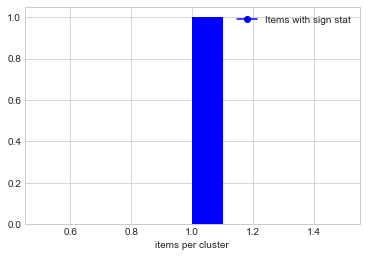

In [42]:
plt.hist(x['True'], color= 'blue')
plt.xlabel('items per cluster')
create_legend({'blue':'Items with sign stat'})
#plt.savefig('./plots/items_per_cluster_good.png')
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


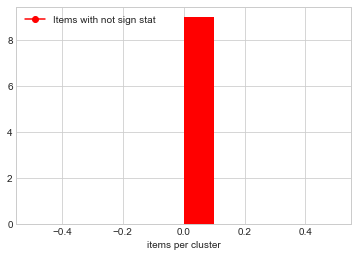

In [43]:
plt.hist(x['False'],color ='red')
plt.xlabel('items per cluster')
create_legend({'red':'Items with not sign stat'})
#plt.savefig('./plots/items_per_cluster_bad.png')
plt.show()

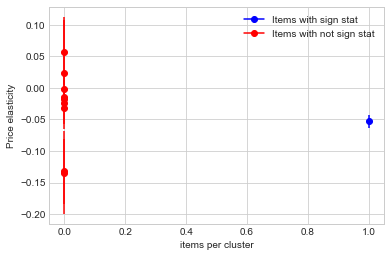

In [44]:
plt.errorbar(x['True'], y['True'], yerr=y_err['True'],fmt='o', c='blue')
plt.errorbar(x['False'], y['False'], yerr=y_err['False'],fmt='o',c='red')
plt.xlabel('items per cluster')
plt.ylabel('Price elasticity')


create_legend()
#plt.savefig('./plots/PE_vs_items_per_cluster.png')
plt.show()



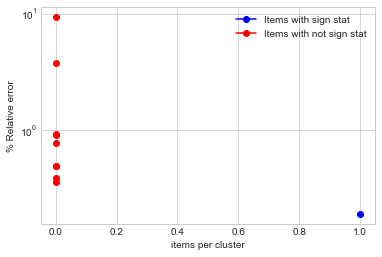

In [45]:
plt.scatter(x['False'],rel_err['False'],c='red')
plt.scatter(x['True'],rel_err['True'],c='blue')
plt.xlabel('items per cluster')
plt.ylabel('% Relative error')
plt.yscale('log')
create_legend()
#plt.savefig('./plots/Relative_error_vs_items_per_cluster.png')
plt.show()

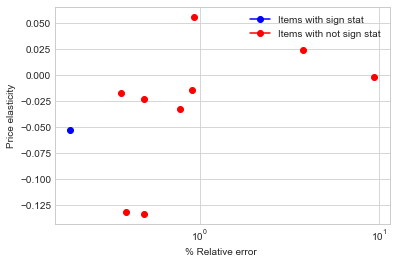

In [46]:
plt.scatter(rel_err['False'],y['False'],c='red')
plt.scatter(rel_err['True'],y['True'],c='blue')
plt.ylabel('Price elasticity')
plt.xlabel('% Relative error ')
plt.xscale('log')
create_legend()
#plt.savefig('./plots/Relative_error_vs_PE.png')
plt.show()



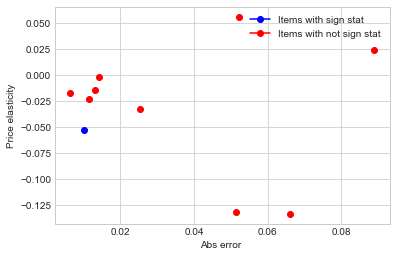

In [47]:
plt.scatter(y_err['False'],y['False'],c='red')
plt.scatter(y_err['True'],y['True'],c='blue')
plt.ylabel('Price elasticity')
plt.xlabel('Abs error ')
#plt.xscale('log')
create_legend()
#plt.savefig('./plots/Abs_error_vs_PE.png')
plt.show()



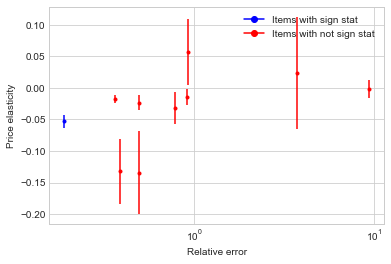

In [48]:
plt.errorbar(rel_err['True'], y['True'], yerr=y_err['True'],fmt='.', c='blue')
plt.errorbar(rel_err['False'], y['False'], yerr=y_err['False'],fmt='.',c='red')
plt.xlabel('Relative error')
plt.ylabel('Price elasticity')
plt.xscale('log')

create_legend()
#plt.savefig('./plots/Rel_err_vs_PE_plus_abs_err.png')
plt.show()

In [54]:
import pickle
def save_obj(obj, name ):
    with open('pickle_files/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)




In [56]:
save_obj(map_result,"top10_one_item_cluster")



In [ ]:
wls_high_stat = smf.wls("log_conv_rate ~ log_price + log_delivery_weeks + C(item_code)", df_filt, weights=df_filt['bin']).fit()
print(wls_high_stat.summary())

In [22]:
wls_high_stat_del = smf.wls("log_conv_rate ~ log_price + delivery_weeks + C(item_code)", df_filt, weights=df_filt['bin']).fit()
print(wls_high_stat_del.summary())



                            WLS Regression Results                            
Dep. Variable:          log_conv_rate   R-squared:                       0.787
Model:                            WLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     33.53
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          1.91e-191
Time:                        15:53:51   Log-Likelihood:                -758.67
No. Observations:                 795   AIC:                             1677.
Df Residuals:                     715   BIC:                             2052.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [23]:
#wls_model_with_fe = smf.wls("log_sales ~ log_price + log_delivery_weeks + log_avg_unique_views + C(item_code)", df, weights=df['bin']).fit()
#print(wls_model_with_fe.summary())


In [24]:
#wls_model_with_fe_all_in = smf.wls("log_sales ~ log_price + log_delivery_weeks + log_avg_unique_views + log_conv_rate +  C(item_code)", df, weights=df['bin']).fit()
#print(wls_model_with_fe_all_in.summary())



In [25]:
#WLS CV rate vs the rest
wls_cr_with_fe = smf.wls("log_conv_rate ~ log_price + log_delivery_weeks + C(item_code)", df, weights=df['bin']).fit()
print(wls_cr_with_fe.summary())


                            WLS Regression Results                            
Dep. Variable:          log_conv_rate   R-squared:                       0.631
Model:                            WLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     82.56
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -6828.7
No. Observations:                4592   AIC:                         1.385e+04
Df Residuals:                    4498   BIC:                         1.445e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [26]:
def run_model(item_code, df):
    print(f'Running model for the item_code {item_code}')
    wls_cr_with_fe = smf.wls("conv_rate ~ log_price + log_delivery_weeks + C(item_code)", df, weights=df['bin']).fit()
    print(wls_cr_with_fe.summary())
    beta_log_price, beta_std_err_log_price = wls_cr_with_fe.params[-2].round(4),wls_cr_with_fe.bse[-2].round(4)
    beta_log_del, beta_std_err_log_del = wls_cr_with_fe.params[-1].round(4),wls_cr_with_fe.bse[-1].round(4)
    Result_log_price = 'Log_price  = ' + str(beta_log_price) + ' ± ' + str(beta_std_err_log_price)
    Result_log_del = 'Log_del_week = ' + str(beta_log_del) + ' ± ' + str(beta_std_err_log_del)



In [27]:
end_date = pd.to_datetime('2020-11-10').date()
df_before_BF = df[df['max_date'] <= end_date]
df_before_BF

,min_date,max_date,item_code,item_price,delivery_weeks,avg_sales,avg_unique_views,conv_rate,bin,item_parent_item_code,item_main_category,item_sub_category_1,item_sub_category_2,log_price,log_delivery_weeks,log_sales,log_avg_unique_views,log_conv_rate
0,2020-01-01,2020-01-07,000000001000054998,749.99,2,1.428571,72.857143,0.019608,7,000000008000006211,POLSTER,ECKSOFAS,LONGCHAIR,6.620060,0.693197,0.356745,4.288502,-3.926739
1,2020-01-01,2020-01-22,000000001000091265,599.99,1,1.818182,61.818182,0.029412,22,000000008000009860,MATRATZEN&LATTENROSTE,MATRATZEN,KALTSCHAUMMATRATZEN,6.396913,0.000100,0.597892,4.124199,-3.522966
2,2020-01-01,2020-01-02,000000001000021540,1449.99,2,1.500000,323.500000,0.004637,2,000000008000001826,POLSTER,WOHNLANDSCHAFTEN,WOHNLANDSCHAFTEN,7.279312,0.693197,0.405532,5.779199,-5.352397
3,2020-01-01,2020-01-07,000000001000054984,749.99,2,2.142857,152.142857,0.014085,7,000000008000006211,POLSTER,ECKSOFAS,LONGCHAIR,6.620060,0.693197,0.762187,5.024821,-4.255605
4,2020-01-01,2020-01-07,000000001000054946,1099.99,2,3.000000,275.000000,0.010909,7,000000008000006213,POLSTER,WOHNLANDSCHAFTEN,WOHNLANDSCHAFTEN,7.003056,0.693197,1.098646,5.616771,-4.509034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,2020-11-10,2020-11-10,000000001000008546,249.99,2,13.000000,429.000000,0.030303,1,000000001000008546-P,BÜRO,SCHREIBTISCHE,GERADE SCHREIBTISCHE,5.521421,0.693197,2.564957,6.061457,-3.493213
4041,2020-11-10,2020-11-10,000000001000062032,1549.99,3,3.000000,240.000000,0.012500,1,000000008000006759,BETTEN,BOXSPRINGBETTEN,BOXSPRINGBETTEN,7.346004,1.098646,1.098646,5.480639,-4.374058
4043,2020-11-10,2020-11-10,000000001000062061,1649.99,7,2.000000,185.000000,0.010811,1,000000008000006759,BETTEN,BOXSPRINGBETTEN,BOXSPRINGBETTEN,7.408525,1.945924,0.693197,5.220356,-4.518001
4045,2020-11-10,2020-11-10,000000001000021703,749.99,5,8.000000,269.000000,0.029740,1,000000008000001862,POLSTER,ECKSOFAS,OTTOMANE,6.620060,1.609458,2.079454,5.594712,-3.511913


In [28]:
wls_cr_del_w_with_fe_before_BF = smf.wls("log_conv_rate ~ log_price + log_delivery_weeks + C(item_code)", df_before_BF, weights=df_before_BF['bin']).fit()
print(wls_cr_del_w_with_fe_before_BF.summary())


                            WLS Regression Results                            
Dep. Variable:          log_conv_rate   R-squared:                       0.641
Model:                            WLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     74.47
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -5884.5
No. Observations:                3976   AIC:                         1.196e+04
Df Residuals:                    3882   BIC:                         1.255e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

<AxesSubplot:xlabel='log_price'>

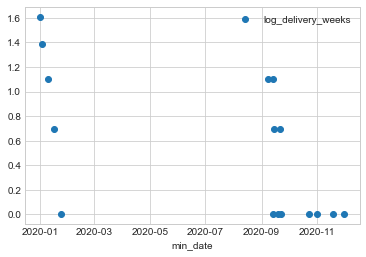

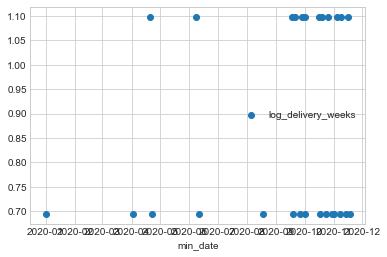

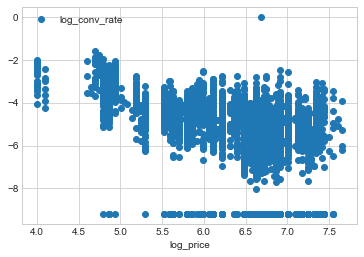

In [29]:
df[df['item_code']== '000000001000016019'].plot(x='min_date',y='log_delivery_weeks', style = 'o')
df[df['item_code']== '000000001000022573'].plot(x='min_date',y='log_delivery_weeks', style = 'o')
df_before_BF.plot(x='log_price',y='log_conv_rate', style = 'o')